In [1]:
# Settings for autoreloading.

%load_ext autoreload
%autoreload 2

In [2]:
import wandb


wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: riccardo-spolaor94 (ai-industry). Use `wandb login --relogin` to force relogin


True

In [3]:
from src.model import get_model_dictionary

models = [
    'cloud-diffuser-baseline',
    'cloud-diffuser-baseline-no-autoregression',
    'cloud-diffuser-baseline-autoregression',
    'cloud-diffuser-baseline-autoregression-multichannel',
    'cloud-diffuser-unet-gru-last-output',
    'cloud-diffuser-unet-gru-last-output-and-last-frame',
    'cloud-diffuser-3D-autoregression',
    'cloud-diffuser-3D-no-autoregression',
]

models_refined_names = [
    'Baseline (on 1 frame)',
    'Baseline without autoregression',
    'Baseline with autoregression',
    'Baseline with autoregression (Multichannel)',
    'GRU (last hidden state)',
    'GRU (last hidden state and last frame)',
    'Space-Time UNet with autoregression',
    'Space-Time UNet without autoregression'
]

models_names_dictionary = {
    m: n for m, n in zip(models, models_refined_names) }

models_artifacts = { m: 'unet_small:latest' for m in models }
models_dictionaries = {
    models_names_dictionary[m]: get_model_dictionary(v, m)
    for m, v in models_artifacts.items() }

wandb: Downloading large artifact unet_small:latest, 239.75MB. 1 files... Done. 0:0:36.0


wandb: Downloading large artifact unet_small:latest, 239.75MB. 1 files... Done. 0:0:0.7


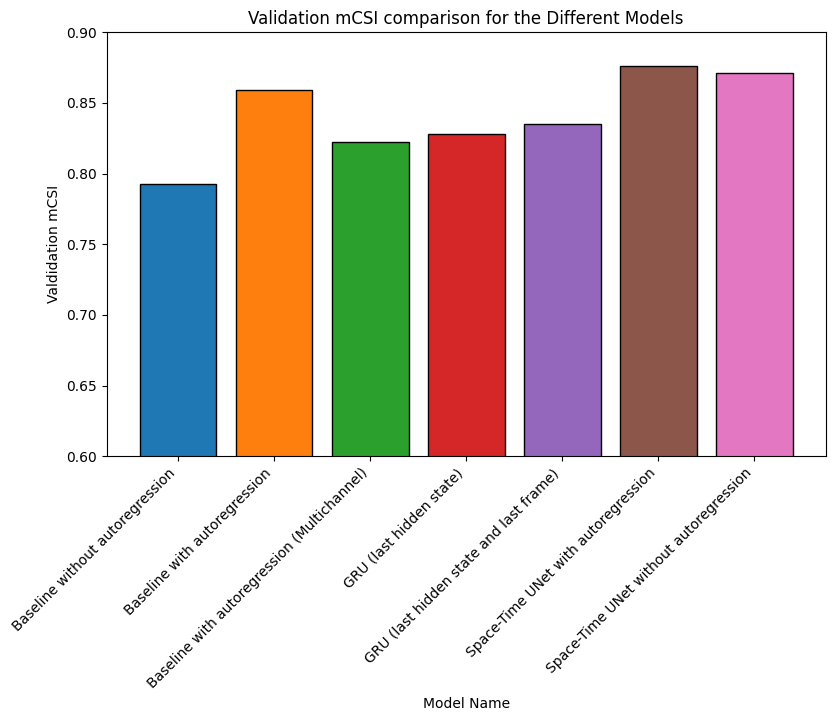

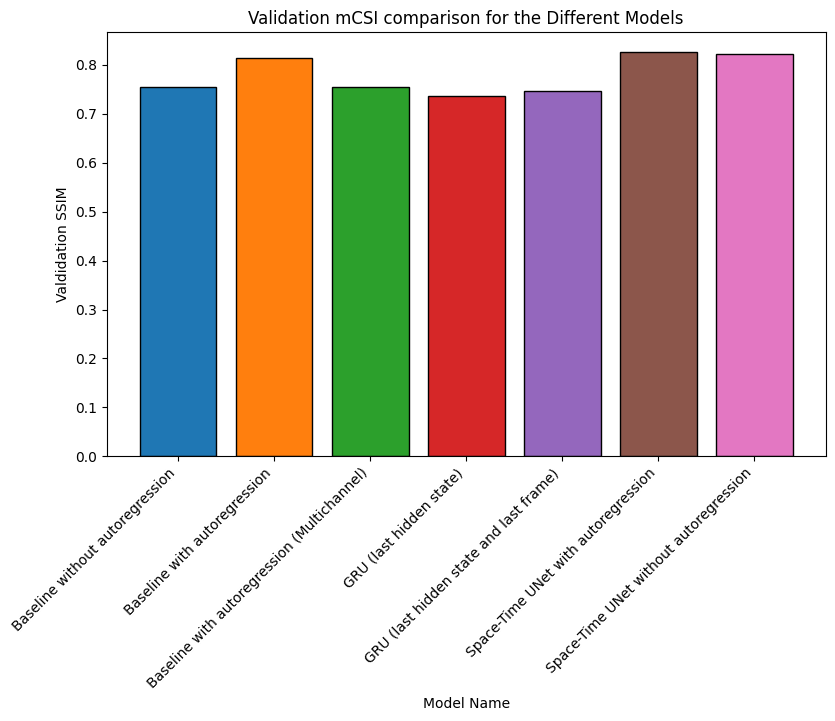

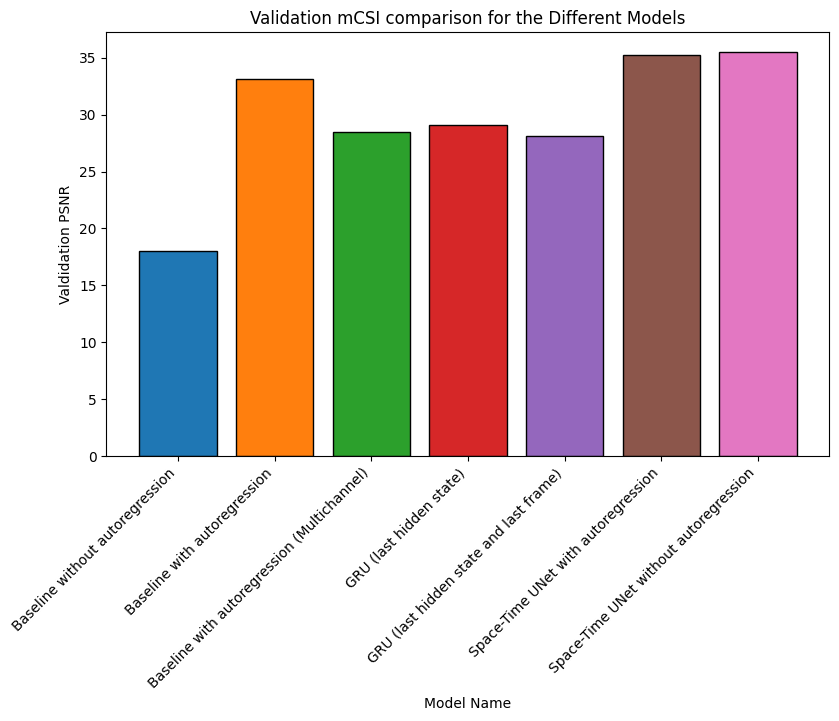

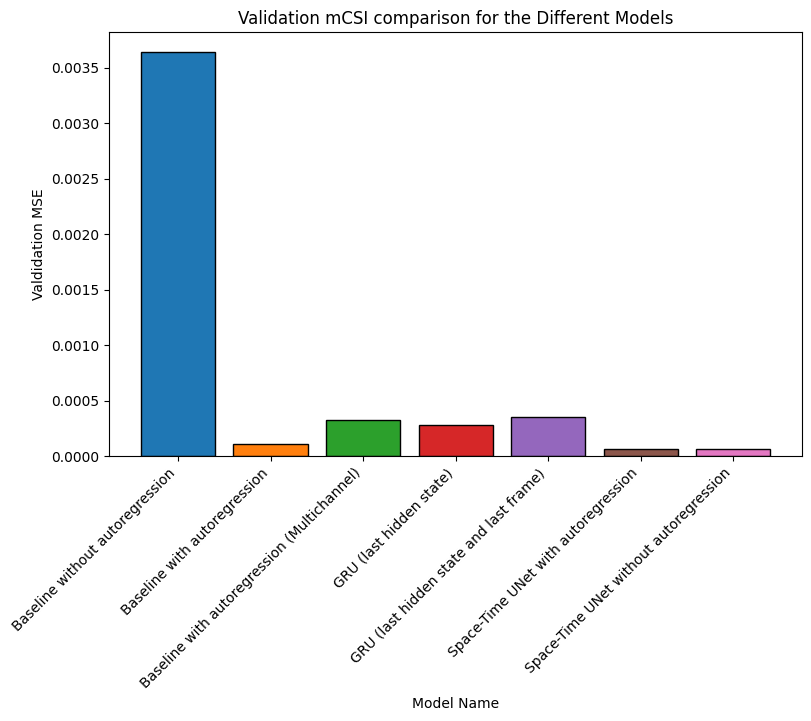

In [10]:
from src.visualization import plot_metric

m = models_dictionaries.copy()
m.pop('Baseline (on 1 frame)')

plot_metric('val_m_csi', 'mCSI', m)
plot_metric('val_ssim', 'SSIM', m)
plot_metric('val_psnr', 'PSNR', m)
plot_metric('val_mse', 'MSE', m)

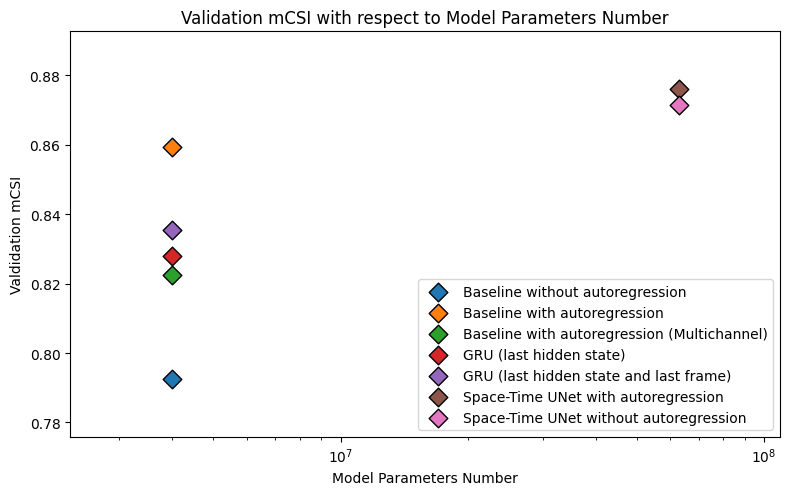

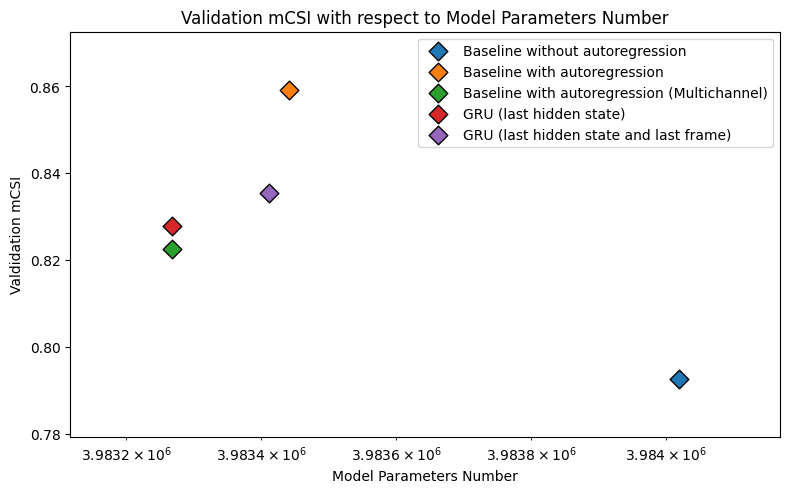

In [7]:
from src.visualization import plot_model_parameters_vs_m_csi

m = models_dictionaries.copy()
m.pop('Baseline (on 1 frame)')
plot_model_parameters_vs_m_csi(m)

m1 = { k: v for k,v in m if k not in [
    'Space-Time UNet with autoregression',
    'Space-Time UNet without autoregression'] }
plot_model_parameters_vs_m_csi(m)

m2 = m.copy()
m2.pop('Space-Time UNet with autoregression')
m2.pop('Space-Time UNet without autoregression')
plot_model_parameters_vs_m_csi(m2)

c:\Users\riccardo\Desktop\cloud-movement-diffusion\src\visualization.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[0].yaxis.set_ticklabels(


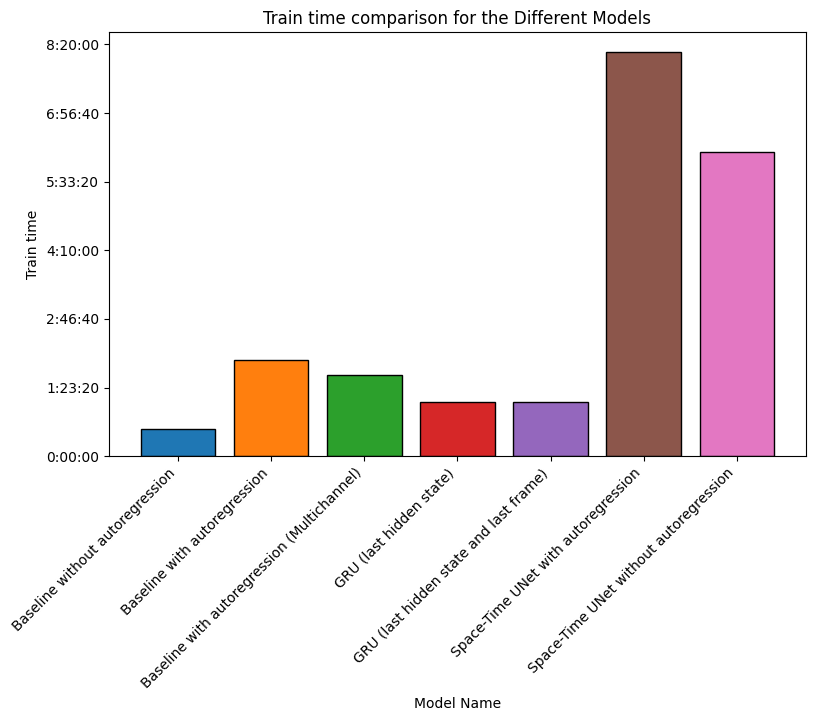

In [13]:
# Plot times
from src.visualization import plot_training_time
from datetime import time

# Create dictionary of times in datetime format

model_times = {
    'Baseline without autoregression': time(0, 32, 47),
    'Baseline with autoregression': time(1, 56, 25),
    'Baseline with autoregression (Multichannel)': time(1, 38, 43),
    'GRU (last hidden state)': time(1, 6, 3),
    'GRU (last hidden state and last frame)': time(1, 5, 50),
    'Space-Time UNet with autoregression': time(8, 10, 9),
    'Space-Time UNet without autoregression': time(6, 9, 24)}

plot_training_time(model_times)

In [ ]:
'''# Plot the times taken from wandb runs

models_times = {
    'Baseline without autoregression': 1h 56m 25
    'Baseline with autoregression': 32m 47s,
    'Baseline with autoregression (Multichannel)': 1h 38m 43s,
    'GRU (last hidden state)': 1h 6m 3s,
    'GRU (last hidden state and last frame)': 1h 5m 50s,
    'Space-Time UNet with autoregression': 8h 10m 9s,
    'Space-Time UNet without autoregression': 6h 9m 24s
}'''